In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_iris

In [3]:
data=load_iris()

In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
feats=pd.DataFrame(data['data'],columns=data.feature_names)

In [7]:
target=pd.DataFrame(data['target'],columns=['Target'])

In [8]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
names={0:'setosa', 1:'versicolor', 2:'virginica'}

In [10]:
df=pd.concat([feats,target],axis=1)

In [11]:
df['Target']=df['Target'].replace(names)

In [12]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

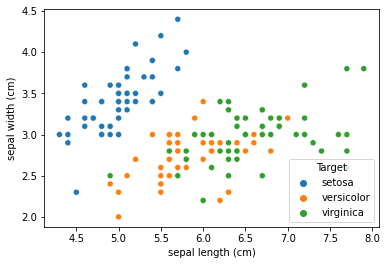

In [13]:
sns.scatterplot(x=df['sepal length (cm)'],y=df['sepal width (cm)'],hue=df['Target'])

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

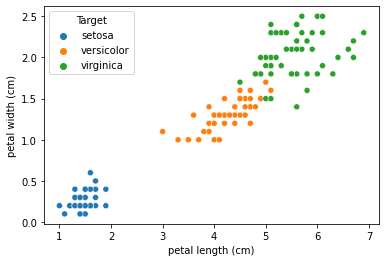

In [14]:
sns.scatterplot(x=df['petal length (cm)'],y=df['petal width (cm)'],hue=df['Target'])

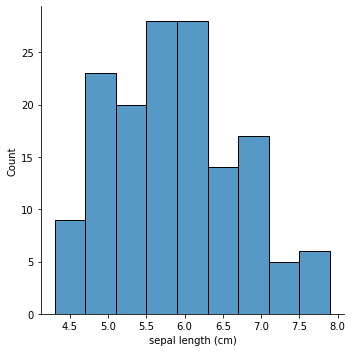

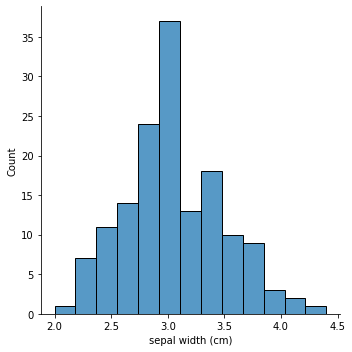

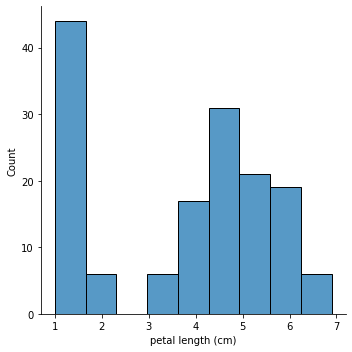

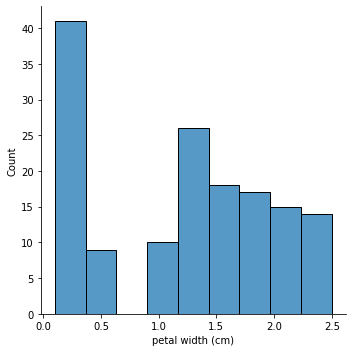

In [15]:
for i in feats:
    sns.displot(df[i])
    plt.show()

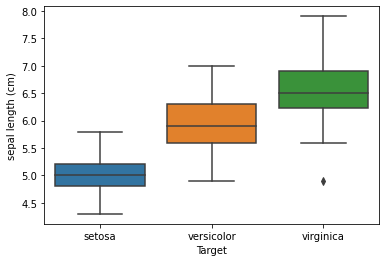

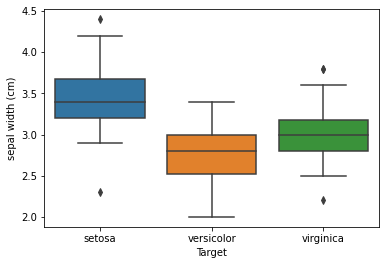

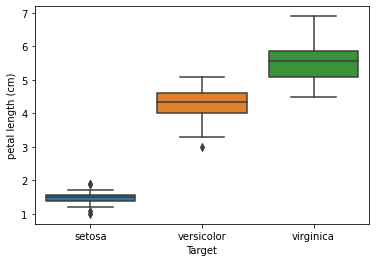

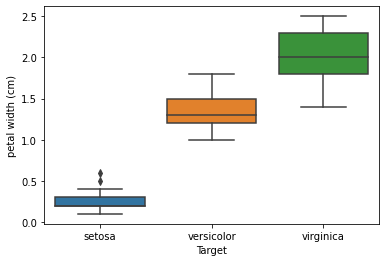

In [16]:
for i in feats:
    sns.boxplot(y=df[i],x=df['Target'])
    plt.show()

In [17]:
df.groupby('Target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Target,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [18]:
# Mean Sepal length for setosa is lowest among 3
# Mean Sepal length for Virginica is max among 3

# Mean Sepal width for Versicolor is lowest among 3
# Mean Sepal width for setosa is max among 3

# Mean petal length for setosa is lowest among 3
# Mean petal length for Virginica is max among 3

# Mean petal width for setosa is lowest among 3
# Mean petal width for Virginica is max among 3

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

In [21]:
df['Target']=le.fit_transform(df[['Target']])

In [22]:
df.shape

(150, 5)

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [24]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
x=df.drop('Target',axis=1)
y=df['Target']

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [27]:
x_train_sc=sc.fit_transform(xtrain)
x_test_sc=sc.transform(xtest)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model=DecisionTreeClassifier()

In [30]:
model.fit(x_train_sc,ytrain)

DecisionTreeClassifier()

In [31]:
train_pred=model.predict(x_train_sc)
test_pred=model.predict(x_test_sc)

In [32]:
model.score(x_train_sc,ytrain)

1.0

In [33]:
model.score(x_test_sc,ytest)

0.9736842105263158

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(ytrain,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        37

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

